<a href="https://colab.research.google.com/github/rahelmichiko/pemodelan-matematika/blob/main/SIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [ ]:
# Populasi total
# N = S+I+R
N = 1000

#Nilai awal individu yang terinfeksi dan yang pulih
I0, R0 = 1, 0

#S0 yang retan terinfeksi
S0 = N - I0 - R0

#Laju infeksi (beta) dan laju rata-rata sembuh (gamma) dalam satuan/hari
beta, gamma = 0.2, 1./10

# Grid hari (dalam hari)
t = np.linspace (0, 365, 365)

In [ ]:
# Model persamaan diferensial SIR
def deriv(y, t, N, beta, gamma):
  S, I, R = y
  dSdt = - beta * S * I / N
  dIdt = beta * S * I / N - gamma * I
  dRdt = gamma * I
  return dSdt, dIdt, dRdt

# vektor nilai awal
y0 = S0, I0, R0

# cari solusi dengan integral terhadap waktu
sol = odeint(deriv, y0, t, args= (N, beta, gamma))

In [ ]:
sol

array([[9.99000000e+02, 1.00000000e+00, 0.00000000e+00],
       [9.98789307e+02, 1.10522993e+00, 1.05463076e-01],
       [9.98556500e+02, 1.22147893e+00, 2.22021442e-01],
       ...,
       [2.02845907e+02, 1.01283866e-05, 7.97154083e+02],
       [2.02845906e+02, 9.54233799e-06, 7.97154084e+02],
       [2.02845906e+02, 8.99024261e-06, 7.97154085e+02]])

In [ ]:
S, I, R = sol.T

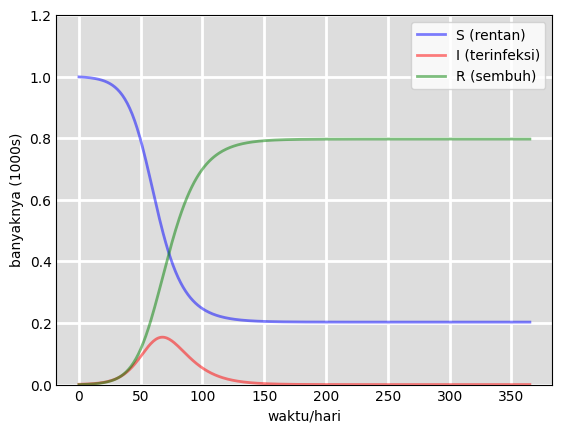

In [ ]:
# Plot data
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S (rentan)')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I (terinfeksi)')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R (sembuh)')

ax.set_xlabel('waktu/hari')
ax.set_ylabel('banyaknya (1000s)')

ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)

ax.grid(which='major', c='w', lw=2, ls='-')

legend = ax.legend()
plt.show()